In [20]:
!pip install geopy

In [21]:
# Import pandas
import pandas as pd
import geocoder as gc
from tqdm import tqdm
#from geopy.geocoders import Nominatim
#from geopy.distance import vincenty

# Import BoxPlot, output_notebook, and show from bokeh.charts
from bokeh.charts import BoxPlot, Donut, Bar, Histogram, output_notebook, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.layouts import gridplot, row
from bokeh.models import HoverTool
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import ColumnDataSource


In [22]:
# Assign spreadsheet filename: file
file = 'imd_student_blind.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['Sheet1']


In [23]:
# Load a sheet into a DataFrame by index: df
df = xl.parse(0)

# Print the head of the DataFrame df
df.head()

,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina
0,0,59015430,2014,1,CANCELADO,2014,2,2.6,0,Reprovado
1,0,59015430,2014,1,CANCELADO,2015,1,8.0,0,Aprovado
2,1,59073120,2014,1,CANCELADO,2014,2,0.1,0,Reprovado
3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado
4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado


In [24]:
df.columns

Index(['a_ID', 'CEP', 'ano_ingresso', 'periodo_ingresso', 'status',
       'ano_disciplina', 'periodo_disciplina', 'nota', 'disciplina_ID',
       'status.disciplina'],
      dtype='object')

In [25]:
df.shape

(4842, 10)

In [26]:
#Cópia por valores, não mexer no DF principal
disciplinas = df.copy()

disciplinas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4842 entries, 0 to 4841
Data columns (total 10 columns):
a_ID                  4842 non-null int64
CEP                   4842 non-null int64
ano_ingresso          4842 non-null int64
periodo_ingresso      4842 non-null int64
status                4842 non-null object
ano_disciplina        4842 non-null int64
periodo_disciplina    4842 non-null int64
nota                  4842 non-null float64
disciplina_ID         4842 non-null int64
status.disciplina     4842 non-null object
dtypes: float64(1), int64(7), object(2)
memory usage: 416.1+ KB


In [27]:
disciplinas.columns.values.tolist()

['a_ID',
 'CEP',
 'ano_ingresso',
 'periodo_ingresso',
 'status',
 'ano_disciplina',
 'periodo_disciplina',
 'nota',
 'disciplina_ID',
 'status.disciplina']

In [28]:
#Retira informações desnecessárias para essa análise

disciplinas.drop(disciplinas.columns[0:4], axis=1, inplace=True)

In [29]:
#Objetivo 1 -> Média da disciplina X por período e ano
#Objetivo 2 -> Taxa de trancamento e cancelamento por período e ano
disciplinas.columns.values.tolist()

['status',
 'ano_disciplina',
 'periodo_disciplina',
 'nota',
 'disciplina_ID',
 'status.disciplina']

In [30]:
disciplinas = disciplinas[disciplinas['status'] == 'ATIVO']
disciplinas.head()

,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina
3,ATIVO,2014,2,6.1,0,Aprovado
4,ATIVO,2014,1,3.0,0,Reprovado
5,ATIVO,2014,2,7.2,0,Aprovado
8,ATIVO,2014,2,8.9,0,Aprovado
12,ATIVO,2014,2,5.6,0,Aprovado


In [31]:
disciplinas_categorias =  disciplinas.groupby(['ano_disciplina', 'periodo_disciplina', 'disciplina_ID']).mean()

# convert the index to a column
disciplinas_categorias.reset_index(inplace = True )
disciplinas_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
ano_disciplina        42 non-null int64
periodo_disciplina    42 non-null int64
disciplina_ID         42 non-null int64
nota                  42 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [32]:
disciplinas_categorias[disciplinas_categorias['disciplina_ID'] == 0]

,ano_disciplina,periodo_disciplina,disciplina_ID,nota
0,2014,1,0,5.872727
6,2014,2,0,5.625676
13,2015,1,0,6.126316
19,2015,2,0,5.486555
26,2016,1,0,4.139394
33,2016,2,0,5.750758


In [33]:
# Make a box plot: p
p = BoxPlot(disciplinas_categorias, values='nota', label='disciplina_ID', color='disciplina_ID',
             title='Distribuição da média de notas das disciplinas',
             legend='bottom_right')

# Set the y axis label
p.yaxis.axis_label='Média por período'
p.add_tools(HoverTool(tooltips=[("Nota", "$y")]))

# Call the output_notebook() 
output_notebook()
show(p)

Loading BokehJS ...

In [34]:
ps = []
#tbs = []

for atual in range(0,7):
    p = BoxPlot(disciplinas_categorias[disciplinas_categorias['disciplina_ID'] == atual], values='nota', label='periodo_disciplina',
                        color='periodo_disciplina', title='Ddisciplina '+str(atual), legend='bottom_right')
    p.yaxis.axis_label='Média por período'
    p.add_tools(HoverTool(tooltips=[("Nota", "$y")]))
    
    #temp = Panel(child=p, title='Ddisciplina '+str(atual))
    
    #tbs.append(temp)
    ps.append(p)
    
# Make a box plot: p


# Set the y axis label

grid = gridplot([ps[0:2], ps[2:4], ps[4:6], [None, ps[6]]], sizing_mode='scale_width')
#grid = gridplot([[ps[0], ps[1]], [ps[2], ps[3]], [ps[4], ps[5]], [None, ps[6]]], sizing_mode='scale_width')

#tabs = Tabs(tabs=[ tbs[0], tbs[5] ],sizing_mode='scale_width' )

#show(tabs)
# show the results
show(grid)

In [35]:
##Quantidade de alunos ativos/Trancados/cancelados/...
count_series = pd.DataFrame(columns=('Status', 'Count'))
count_series["Status"] = df["status"].unique().tolist()
tam = len(df)

for atual in range(0,len(count_series)):
    count_series.iloc[atual]["Count"] = df[df["status"] == count_series.iloc[atual]["Status"]]["status"].count()

def porcent(val):
    p = (val*100)/tam
    return p
    
graph = Donut(count_series, label="Status", values="Count", title="Situação dos alunos" )
graph.add_tools(HoverTool(tooltips=[("Alunos", str(count_series.iloc[1]["Count"])+"/"+str(tam)), #falta trocar o 1 pelo número de alunos da categoria
                                    ("Porcentagem", str(porcent(1000))) #falta trocar o 1000 pelo numero de alunos da categoria
                                   ]
                         ))

show(graph)

In [36]:
###Verificar desistência
def popula(string):
    aux = []
    for atual in range (2014, 2017):
        aux.append(df[df["ano_ingresso"] == atual][df["status"] == string]["status"].count())
    return aux

count_desist = pd.DataFrame(columns=('ANO', 'CANCELADO', 'ATIVO', 'TRANCADO', 'CONCLUIDO', 'FORMANDO', 'FORMADO'))
count_desist["ANO"] = [2014, 2015, 2016]

for atual in count_desist.columns.values:
    if atual != "ANO":
        count_desist[atual] = popula(atual)

print(count_desist)



C:\Users\nalbertg\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


    ANO  CANCELADO  ATIVO  TRANCADO  CONCLUIDO  FORMANDO  FORMADO
0  2014        584    843       112         13        38       10
1  2015        329   1530       114          7         0        0
2  2016        134   1067        56          0         5        0


In [37]:

BLEND = blend('CANCELADO', "ATIVO",  "TRANCADO",  "CONCLUIDO",  "FORMANDO",  "FORMADO",
              name='unidade', labels_name='Situacao')

bar = Bar(count_desist, values=BLEND,
          label=cat(columns='ANO', sort=False),
          stack=cat(columns='Situacao', sort=False),
          color="Situacao",
          legend='bottom_center',
          title="Índice de formação e desitencia de alunos por ano",
          ylabel = "Alunos",
          tooltips=[('Tipo', "$y")]) ##Corrigir isso também

output_notebook()

show(bar)

Loading BokehJS ...

In [38]:
###Verificar NOtas ENEM
ps = []
temp = ["nota", "enen-nota", "enem-matematica", "enem-redacao"]

for atual in range(0, len(temp)):
    p = BoxPlot(disciplinas_categorias, values=temp[atual], label='disciplina_ID',
                        color='disciplina_ID', title=str(temp[atual])+" x Desempenho em disciplinas ", legend='bottom_right')
    p.yaxis.axis_label='Média por período'
    p.add_tools(HoverTool(tooltips=[("Nota", "$y{f.fff}")]))
    
    #temp = Panel(child=p, title='Ddisciplina '+str(atual))
    
    #tbs.append(temp)
    ps.append(p)
    

grid = gridplot([ps[0:2], ps[2:4]], sizing_mode='scale_width')

output_notebook()
show(grid)

KeyError: 'enen-nota'

In [39]:
#Verificar distancias
distancias = df[df["status"] == "ATIVO"].copy()
distancias["LAT"], distancias["LON"], distancias["KM"] = [0,0,0]
distancias = distancias.reset_index()
uf = gc.google("59064741").latlng

for i in tqdm(range(0,100)): ## trocar o range por range(len(distancias))
    st = distancias.loc[i,'CEP']
    g = gc.google(st)
    if g.lat == None:
        distancias.loc[i, "LAT"] = 0
    elif g.lng == None:
        distancias.loc[i, "LON"] = 0
    else:
        distancias.loc[i, "LON"] = g.lng
        distancias.loc[i, "LAT"] = g.lat
print("Completo")

distancias.to_csv('LatLong_Alunos.csv', encoding="utf-8")
##Salva tabela criada
    
#UFRN 59064-741
distancias.head()

100%|████████████████████████████████████████| 100/100 [01:10<00:00,  1.44it/s]


Completo


,index,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,LAT,LON,KM
0,3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,-5.832998,-35.242542,0
1,4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,-5.872282,-35.206600,0
2,5,3,59088150,2014,1,ATIVO,2014,2,7.2,0,Aprovado,-5.872282,-35.206600,0
3,8,5,59112430,2014,1,ATIVO,2014,2,8.9,0,Aprovado,-5.750546,-35.258952,0
4,12,7,59020330,2014,1,ATIVO,2014,2,5.6,0,Aprovado,-5.798325,-35.202731,0


In [41]:
distancias =  pd.read_csv('LatLong_Alunos.csv', encoding="utf-8", index_col=0)
    
for atual in tqdm(range(0,100)): ## trocar o range por range(len(distancias))
    lt = distancias.loc[atual, "LAT"]
    ln = distancias.loc[atual, "LON"]
    if lt != 0. and ln != 0.:
        compare = (lt, ln)
        #print(vincenty(uf, compare).km)
        distancias.loc[atual, "KM"] = vincenty(uf, compare).km
    
distancias.head()

  0%|                                                  | 0/100 [00:00<?, ?it/s]


NameError: name 'vincenty' is not defined

In [55]:
def binSearch(array, ano, periodo, element_to_search):
    for index in range(len(array)):
        if((periodo == array[index]['PERIODO'] and ano == array[index]['ANO']) and element_to_search == array[index]['DISCIPLINA']):
            return index
    return -1

In [87]:
import copy

def catchTRA(array, tra):
    dict_model = {'ANO': '', 'PERIODO': '', 'DISCIPLINA': 0, 'NUMERO_DE_ALUNOS': 0, 'PORCENTAGEM': 0}
    anos=  [2014, 2015, 2016]
    periodos = [1, 2]
    for ano in anos:
        for periodo in periodos:
            temp_df1 = df[df['status.disciplina'] == tra]
            temp_df2 = temp_df1[temp_df1['periodo_disciplina'] == periodo]
            temp_df3 = temp_df2[temp_df2['ano_disciplina'] == ano]
            #print(temp_df2)
            for index in range(len(temp_df3)):
                disciplina = temp_df3.iloc[index]['disciplina_ID']
            
                bin_result = binSearch(array, ano, periodo, disciplina)
                if bin_result == -1:
                    temp_dict = copy.copy(dict_model)
                    temp_dict['ANO'] = ano
                    temp_dict['PERIODO'] = periodo
                    temp_dict['DISCIPLINA'] = disciplina
                    temp_dict['NUMERO_DE_ALUNOS'] = 1
                    array.append(temp_dict)
                else:
                    array[bin_result]['NUMERO_DE_ALUNOS'] += 1
    
    for index in range(len(array)):
        index_total_estudantes = df[df['ano_disciplina'] == array[index]['ANO']]
        index_total_estudantes = index_total_estudantes[index_total_estudantes['periodo_disciplina'] == array[index]['PERIODO']]
        index_total_estudantes = index_total_estudantes[index_total_estudantes['disciplina_ID'] == array[index]['DISCIPLINA']]
        index_total_estudantes = len(index_total_estudantes)
    
        array[index]['PORCENTAGEM'] = (array[index]['NUMERO_DE_ALUNOS']/index_total_estudantes) * 100

In [89]:
reprovados = []

catchTRA(reprovados, 'Reprovado')

print("\n\n")
print(len(reprovados))
for i in range(len(reprovados)):
    print(reprovados[i], "\n")




40
{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 0, 'NUMERO_DE_ALUNOS': 6, 'PORCENTAGEM': 35.294117647058826} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 1, 'NUMERO_DE_ALUNOS': 33, 'PORCENTAGEM': 16.176470588235293} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 2, 'NUMERO_DE_ALUNOS': 42, 'PORCENTAGEM': 24.561403508771928} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 3, 'NUMERO_DE_ALUNOS': 8, 'PORCENTAGEM': 42.10526315789473} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 5, 'NUMERO_DE_ALUNOS': 24, 'PORCENTAGEM': 54.54545454545454} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 6, 'NUMERO_DE_ALUNOS': 4, 'PORCENTAGEM': 66.66666666666666} 

{'ANO': 2014, 'PERIODO': 2, 'DISCIPLINA': 0, 'NUMERO_DE_ALUNOS': 67, 'PORCENTAGEM': 50.75757575757576} 

{'ANO': 2014, 'PERIODO': 2, 'DISCIPLINA': 1, 'NUMERO_DE_ALUNOS': 2, 'PORCENTAGEM': 40.0} 

{'ANO': 2014, 'PERIODO': 2, 'DISCIPLINA': 2, 'NUMERO_DE_ALUNOS': 5, 'PORCENTAGEM': 29.411764705882355} 

{'ANO': 2014, 'PERIODO': 2, 'DISCIPLINA': 3, 'NUMERO_DE_ALUNOS'

In [90]:
aprovados = []

catchTRA(aprovados, 'Aprovado')

print("\n\n")
print(len(aprovados))
for i in range(len(aprovados)):
    print(aprovados[i], "\n")




40
{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 0, 'NUMERO_DE_ALUNOS': 11, 'PORCENTAGEM': 64.70588235294117} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 1, 'NUMERO_DE_ALUNOS': 171, 'PORCENTAGEM': 83.82352941176471} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 2, 'NUMERO_DE_ALUNOS': 129, 'PORCENTAGEM': 75.43859649122807} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 3, 'NUMERO_DE_ALUNOS': 11, 'PORCENTAGEM': 57.89473684210527} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 5, 'NUMERO_DE_ALUNOS': 20, 'PORCENTAGEM': 45.45454545454545} 

{'ANO': 2014, 'PERIODO': 1, 'DISCIPLINA': 6, 'NUMERO_DE_ALUNOS': 2, 'PORCENTAGEM': 33.33333333333333} 

{'ANO': 2014, 'PERIODO': 2, 'DISCIPLINA': 0, 'NUMERO_DE_ALUNOS': 65, 'PORCENTAGEM': 49.24242424242424} 

{'ANO': 2014, 'PERIODO': 2, 'DISCIPLINA': 1, 'NUMERO_DE_ALUNOS': 3, 'PORCENTAGEM': 60.0} 

{'ANO': 2014, 'PERIODO': 2, 'DISCIPLINA': 2, 'NUMERO_DE_ALUNOS': 12, 'PORCENTAGEM': 70.58823529411765} 

{'ANO': 2014, 'PERIODO': 2, 'DISCIPLINA': 3, 'NUMERO_DE_ALUNOS

In [139]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

def cria_histograma(array, disciplina, titulo_histograma):
    dados = []
    
    anos=  [2014, 2015, 2016]
    periodos = [1, 2]
    
    for ano in anos:
        for periodo in periodos:
            for index in range(len(array)):
                if (array[index]['ANO'] == ano and array[index]['PERIODO'] == periodo) and array[index]['DISCIPLINA'] == disciplina:  
                    dados.append(array[index]['PORCENTAGEM'])
    
    print(dados)
    
    p1 = figure(title=titulo_histograma, tools="save", background_fill_color="#E8DDCB")
    
    hist, edges = np.histogram(dados, density=True, bins=50)

    p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="#036564", line_color="#033649")
    #p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
    #p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

    p1.legend.location = "top_left"
    p1.xaxis.axis_label = 'semestres(2014.1 até 2016.2)'
    p1.yaxis.axis_label = 'porcentgem'


    output_notebook()

    show(gridplot(p1, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

In [140]:
cria_histograma(aprovados, 0, 'Aprovados disciplina 0')

[64.70588235294117, 49.24242424242424, 57.333333333333336, 53.503184713375795, 40.57971014492754, 59.60264900662252]


Loading BokehJS ...

# Daqui para baixo é tudo teste, pode apagar tudo

In [ ]:
disciplinas_categorias.head()

In [91]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p1 = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save", background_fill_color="#E8DDCB")

measured = disciplinas_categorias["nota"]
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0, 10, 1) #range do eixo X
#pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
#cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="#036564", line_color="#033649")
#p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
#p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p1.legend.location = "top_left"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'


output_notebook()

show(gridplot(p1, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

Populating the interactive namespace from numpy and matplotlib


C:\Users\nalbertg\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'hist', 'grid', 'show', 'figure', 'bar']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


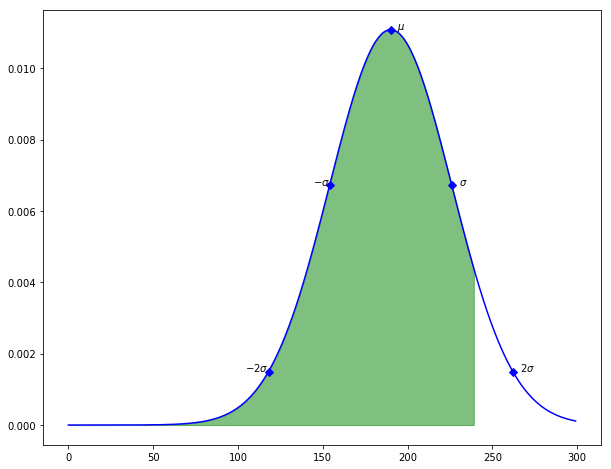

0.9175667301260455

In [92]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

## points under study
xi = 240
mean_face = 190
std_face = 36
axis_x = range(0,300)

## return the cumulative value from Z-Table
cdf = stats.norm.cdf(240, mean_face, std_face)

## -2std, -std, std, 2std 
minus2std = mean_face - 2*std_face
minusstd = mean_face - std_face
plus1std = mean_face + std_face
plus2std = mean_face + 2*std_face

## mark points in the plot
markers_points = [minus2std, minusstd, mean_face, plus1std, plus2std]

## find the probability distribution function
pdf = stats.norm.pdf(axis_x,mean_face,std_face)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf, '-bD',markevery=markers_points)
plt.annotate('$\mu$',xy=(mean_face+4,pdf[mean_face]))
plt.annotate('$-2\sigma$',xy=(minus2std-14,pdf[minus2std]))
plt.annotate('$-\sigma$',xy=(minusstd-10,pdf[minusstd]))
plt.annotate('$\sigma$',xy=(plus1std+4,pdf[plus1std]))
plt.annotate('$2\sigma$',xy=(plus2std+4,pdf[plus2std]))

## The shaded area is cdf at xi, in other words, cdf[240] = 0.9175667301260455
plt.fill_between(axis_x[0:xi], pdf[0:xi],color='g',alpha=.5)

plt.show()

cdf


In [ ]:

geolocator = Nominatim()
location = geolocator.geocode("Brasil")
print(location.address)

In [ ]:
print(df["status.disciplina"])